In [ ]:
import numpy as  np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pickle 
path = '/content/drive/MyDrive/CS247'
with open(path+'/train_data.pkl', 'rb') as fid:
     train_data= pickle.load(fid)

with open(path+'/valid_data.pkl', 'rb') as fid:
     valid_data= pickle.load(fid)

with open(path+'/test_data.pkl', 'rb') as fid:
     test_data= pickle.load(fid)

# with open(path+'/data.pkl', 'rb') as fid:
#      data= pickle.load(fid)

# with open(path+'/sen_emb_train.pkl', 'rb') as fid:
#       xtrain = pickle.load(fid)

# with open(path+'/sen_emb_valid.pkl','rb') as fid:
#       xvalid = pickle.load(fid)

In [ ]:
nan_value = float("NaN")

train_data.replace("", nan_value, inplace=True)

train_data.dropna(inplace=True)

valid_data.replace("",nan_value,inplace=True)
valid_data.dropna(inplace=True)

test_data.replace("",nan_value,inplace=True)
test_data.dropna(inplace=True)

# Train NB's

## Experimentation/exploration

### Data exploration

In [ ]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Target,comment_text_wp,comment_tokenize,comment
112366,591e7ceac4e56588,Would agree. While it's clear that GQ is ripe ...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",would agree clear gq ripe trek references refe...,"[would, agree, clear, gq, ripe, trek, referenc...",would agree while it is clear that gq is ripe ...
108254,42aab9d0fdd419ed,WrestleMania \n\nYou son of a bitch!!! a Moron!,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]",wrestlemania son bitch moron,"[wrestlemania, son, bitch, moron]",wrestlemania you son of a bitch a moron
57809,9abcc8c3f9280395,Larry Doby \n\nI've left some comments on that...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",larry doby left comments section talk page fee...,"[larry, doby, left, comments, section, talk, p...",larry doby i have left some comments on that s...
61339,a43208fc2de19df8,"""\n\nFor kicks, the primary author of """"Cartma...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",kicks primary author cartman gets anal probe f...,"[kicks, primary, author, cartman, gets, anal, ...",for kicks the primary author of cartman gets a...
158189,ea2714389f753568,""" edit area. Do not include the """"tlx|"""" code....",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",edit area include tlx code tlx unblock reason ...,"[edit, area, include, tlx, code, tlx, unblock,...",edit area do not include the tlx code tlx unbl...


In [ ]:
train_data['identity_hate']

112366    0
108254    0
57809     0
61339     0
158189    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: identity_hate, Length: 103683, dtype: int64

### count vectorization experimentation

In [ ]:
to_join = lambda x : " ".join(x)
temp_joined = train_data.copy()
temp_joined['joined'] = train_data.comment_tokenize.apply(to_join)

In [ ]:
temp_joined[temp_joined['joined'] != temp_joined['comment_text_wp']]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Target,comment_text_wp,comment_tokenize,comment,joined
90342,f1c908fab0ecf99f,"""\n\nJust to note that polipo cannot be used a...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",note polipo cannot used reverse proxy right fo...,"[note, polipo, can, not, used, reverse, proxy,...",just to note that polipo cannot be used as rev...,note polipo can not used reverse proxy right f...
148425,4c32f83d9d3ec902,An E-mail Was Just Sent To You (Re: Conversati...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",e mail sent conversation wales personal attack...,"[e, mail, sent, conversation, wales, personal,...",an e mail was just sent to you re conversation...,e mail sent conversation wales personal attack...
147070,3664e51bbb003da0,That's Wehwalt. It's been 20 years since I re...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",wehwalt years since read thing book felt could...,"[wehwalt, years, since, read, thing, book, fel...",that is wehwalt it is been years since i read ...,wehwalt years since read thing book felt could...
121095,87d8bb7ed6147b0a,Why do you just remove parts of an ongoing dis...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",remove parts ongoing discussion bad bad bad si...,"[remove, parts, ongoing, discussion, bad, bad,...",why do you just remove parts of an ongoing dis...,remove parts ongoing discussion bad bad bad si...
139040,e819b39dc0260bb4,ric flairs gonna return dumbass!! \n\n it has...,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",ric flairs gonna return dumbass reported ric f...,"[ric, flairs, gon, na, return, dumbass, report...",ric flairs gonna return dumbass it has been re...,ric flairs gon na return dumbass reported ric ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64505,aca191b71d557fcb,"I agree, and here arises the forlorn expectati...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",agree arises forlorn expectation cannot displa...,"[agree, arises, forlorn, expectation, can, not...",i agree and here arises the forlorn expectatio...,agree arises forlorn expectation can not displ...
13986,24e6de09319e0a96,"""\n\n ban or block? \n\nAs I understand it, a ...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",ban block understand ban something imposed use...,"[ban, block, understand, ban, something, impos...",ban or block as i understand it a ban is somet...,ban block understand ban something imposed use...
124375,9958c23c8d0e51ea,"""\nNo problem. I'm afraid I can't justify the ...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",problem afraid cannot justify time spent walki...,"[problem, afraid, can, not, justify, time, spe...",no problem i am afraid i cannot justify the ti...,problem afraid can not justify time spent walk...
48984,82f576d94c1fa780,I can't post anything as I am blocked. Claims ...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",cannot post anything blocked claims sockpuppet...,"[can, not, post, anything, blocked, claims, so...",i cannot post anything as i am blocked claims ...,can not post anything blocked claims sockpuppe...


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [ ]:
count_vect = CountVectorizer().fit(temp_joined['joined']) 

In [ ]:
X_train_feature = count_vect.transform(temp_joined['joined'])

In [ ]:
type(X_train_feature)

scipy.sparse.csr.csr_matrix

## Data preprocessing




In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
data = [train_data, valid_data, test_data]

In [ ]:
to_join = lambda x : " ".join(x)

In [ ]:
for db in data:
  db['joined'] = db.comment_tokenize.apply(to_join)

corpus = pd.concat( [pd.concat([train_data['joined'], valid_data['joined']]), test_data['joined']])


In [ ]:
count_vect = CountVectorizer().fit(corpus) 

## Model training

In [ ]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
models = {}

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
X_train_feature = count_vect.transform(train_data['joined'])

In [ ]:
def print_metrics(X, y, model):
  pred = model.predict(X)
  f1 = f1_score(y_true=y, y_pred=pred)
  acc = accuracy_score(y_true = y, y_pred = pred)

  print("accuracy score: {}".format(acc))
  print("f1 score: {}".format(f1))

  # ConfusionMatrixDisplay(confusion_matrix(y_true=y, y_pred=pred)).plot()
  print("")

  return f1

### Unbalanced

In [ ]:
for clss in classes:
  bnb = BernoulliNB()
  bnb.fit(X_train_feature, train_data[clss])
  models[clss] = bnb

  print("bnb " + clss)

  print_metrics(X_train_feature, train_data[clss], models[clss])

bnb toxic
accuracy score: 0.9251468418159197
f1 score: 0.3692807801706623

bnb severe_toxic
accuracy score: 0.9895547003848268
f1 score: 0.003679852805887765

bnb obscene
accuracy score: 0.9497121032377536
f1 score: 0.11054247697031729

bnb threat
accuracy score: 0.9968943799851471
f1 score: 0.0

bnb insult
accuracy score: 0.9522293915106623
f1 score: 0.07953911912283962

bnb identity_hate
accuracy score: 0.9906638503901315
f1 score: 0.0



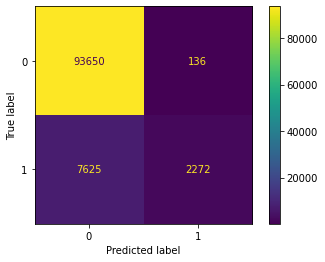

In [ ]:
pred = models['toxic'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['toxic'], y_pred=pred)).plot()

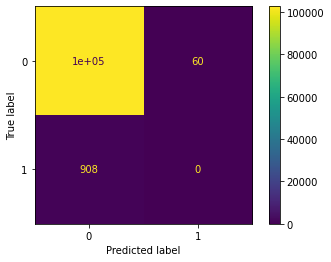

In [ ]:
pred = models['identity_hate'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['identity_hate'], y_pred=pred)).plot()

### Balanced

In [ ]:
balanced_models = {}

In [ ]:
X_train_features = {}

In [ ]:
balanced_data = {}

In [ ]:
def resample(data, clss):
  minorities = data[data[clss] == 1]
  majorities = data[data[clss] == 0]

  minority_number = minorities.shape[0]
  # majority_number = majorities.shape[0]

  minority_sample = minorities.sample(minority_number*2, replace = True)
  majority_sample = majorities.sample(minority_number*2, replace = True)

  return pd.concat([minority_sample, majority_sample])

In [ ]:
for clss in classes:
  balanced_data[clss] = resample(train_data, clss)
  X_train_features[clss] = count_vect.transform(balanced_data[clss]['joined'])

  balanced_models[clss] = BernoulliNB()
  balanced_models[clss].fit(X_train_features[clss], balanced_data[clss][clss])

  print("balanced bnb " + clss)

  print_metrics(X_train_features[clss], balanced_data[clss][clss], balanced_models[clss])

balanced bnb toxic
accuracy score: 0.775335960392038
f1 score: 0.8100140983466484

balanced bnb severe_toxic
accuracy score: 0.8111753371868978
f1 score: 0.8405207485760782

balanced bnb obscene
accuracy score: 0.789369717015803
f1 score: 0.8215883886532549

balanced bnb threat
accuracy score: 0.8192675159235668
f1 score: 0.846931894807822

balanced bnb insult
accuracy score: 0.7867647058823529
f1 score: 0.8199808357288673

balanced bnb identity_hate
accuracy score: 0.8152533039647577
f1 score: 0.8428203326305926



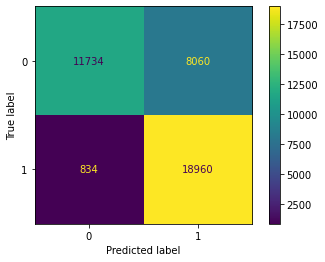

In [ ]:
pred = balanced_models['toxic'].predict(X_train_features['toxic'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['toxic']['toxic'], y_pred=pred)).plot()

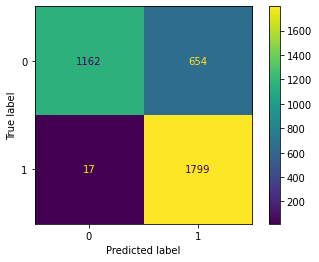

In [ ]:
pred = balanced_models['identity_hate'].predict(X_train_features['identity_hate'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['identity_hate']['identity_hate'], y_pred=pred)).plot()

# Train LogReg's

## Model Training

### Unbalanced

In [ ]:
log_regs = {}

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for clss in classes:
  lr = LogisticRegression(class_weight='balanced')
  lr.fit(X_train_feature, train_data[clss])
  log_regs[clss] = lr

  print("log reg " + clss)

  print_metrics(X_train_feature, train_data[clss], log_regs[clss])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg toxic
accuracy score: 0.9773444055438211
f1 score: 0.8929499156906531



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg severe_toxic
accuracy score: 0.9827261942652122
f1 score: 0.5361305361305361



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg obscene
accuracy score: 0.9821571520885777
f1 score: 0.8528944020356234



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg threat
accuracy score: 0.9967979321585988
f1 score: 0.6541666666666667



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg insult
accuracy score: 0.9739880211799428
f1 score: 0.7884539963918737

log reg identity_hate
accuracy score: 0.9875968095058978
f1 score: 0.5843568196509373



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


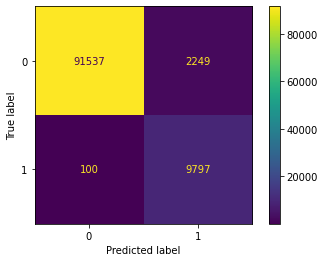

In [ ]:
pred = log_regs['toxic'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['toxic'], y_pred=pred)).plot()

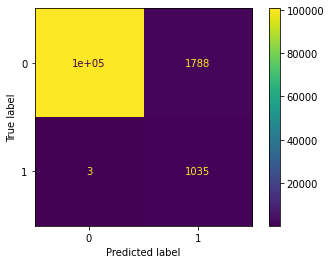

In [ ]:
pred = log_regs['severe_toxic'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['severe_toxic'], y_pred=pred)).plot()

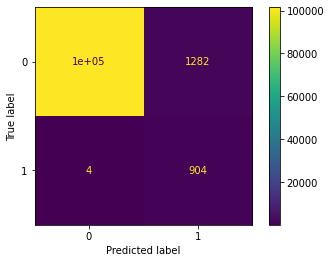

In [ ]:
pred = log_regs['identity_hate'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['identity_hate'], y_pred=pred)).plot()

### Unbalanced Variable Iterations

In [ ]:
log_regs_vitr = {}

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for clss in classes:
  iterations = 0
  if (clss == 'severe_toxic' or clss == 'threat' or clss == 'identity_hate'):
    iterations = 400
  else:
    iterations = 300
  lr = LogisticRegression(class_weight='balanced', max_iter=iterations)
  lr.fit(X_train_feature, train_data[clss])
  log_regs_vitr[clss] = lr

  print("log reg variable iterations " + clss)

  print_metrics(X_train_feature, train_data[clss], log_regs_vitr[clss])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg variable iterations toxic
accuracy score: 0.9813180559976081
f1 score: 0.9101785300255043



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg variable iterations severe_toxic
accuracy score: 0.987751126028375
f1 score: 0.6199880311190903



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg variable iterations obscene
accuracy score: 0.9893039360358015
f1 score: 0.9071888860992551



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg variable iterations threat
accuracy score: 0.9970679860729339
f1 score: 0.6738197424892703



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


log reg variable iterations insult
accuracy score: 0.9817231368691106
f1 score: 0.8418593006759576

log reg variable iterations identity_hate
accuracy score: 0.9927085443129539
f1 score: 0.705378020265004



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


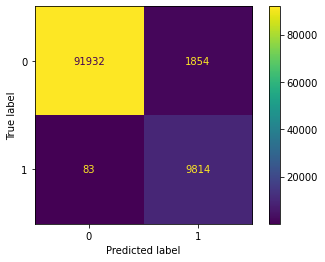

In [ ]:
pred = log_regs_vitr['toxic'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['toxic'], y_pred=pred)).plot()

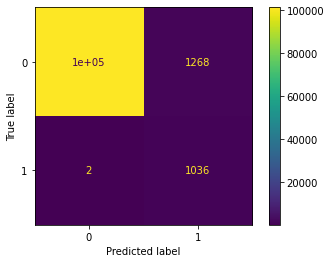

In [ ]:
pred = log_regs_vitr['severe_toxic'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['severe_toxic'], y_pred=pred)).plot()

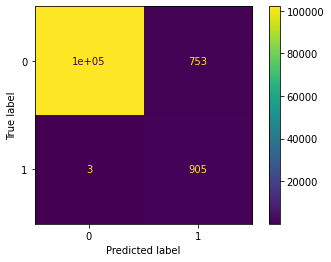

In [ ]:
pred = log_regs_vitr['identity_hate'].predict(X_train_feature)
ConfusionMatrixDisplay(confusion_matrix(y_true=train_data['identity_hate'], y_pred=pred)).plot()

### Balanced

In [ ]:
balanced_log_regs = {}

In [ ]:
for clss in classes:
  balanced_log_regs[clss] = LogisticRegression(class_weight='balanced')
  balanced_log_regs[clss].fit(X_train_features[clss], balanced_data[clss][clss])

  print("balanced log reg " + clss)

  print_metrics(X_train_features[clss], balanced_data[clss][clss], balanced_log_regs[clss])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg toxic
accuracy score: 0.988910781044761
f1 score: 0.9889054562915414



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg severe_toxic
accuracy score: 0.9942196531791907
f1 score: 0.9942418426103647



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg obscene
accuracy score: 0.9938901139287026
f1 score: 0.9938847763115546

balanced log reg threat
accuracy score: 0.9984076433121019
f1 score: 0.9984076433121019



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg insult
accuracy score: 0.9909692064745361
f1 score: 0.9909945376703903

balanced log reg identity_hate
accuracy score: 0.9944933920704846
f1 score: 0.9945054945054946



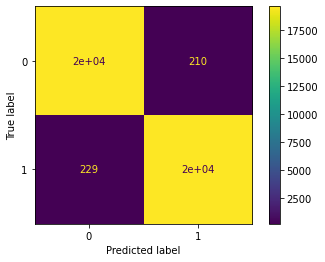

In [ ]:
pred = balanced_log_regs['toxic'].predict(X_train_features['toxic'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['toxic']['toxic'], y_pred=pred)).plot()

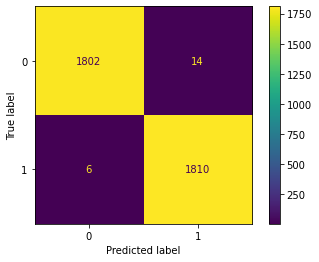

In [ ]:
pred = balanced_log_regs['identity_hate'].predict(X_train_features['identity_hate'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['identity_hate']['identity_hate'], y_pred=pred)).plot()

### Balanced liblinear

In [ ]:
balanced_log_regs_libl = {}

In [ ]:
for clss in classes:
  balanced_log_regs_libl[clss] = LogisticRegression(class_weight='balanced', solver='liblinear')
  balanced_log_regs_libl[clss].fit(X_train_features[clss], balanced_data[clss][clss])

  print("balanced log reg liblinear " + clss)

  print_metrics(X_train_features[clss], balanced_data[clss][clss], balanced_log_regs_libl[clss])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


balanced log reg liblinear toxic
accuracy score: 0.9887844801454987
f1 score: 0.9887844801454987

balanced log reg liblinear severe_toxic
accuracy score: 0.9942196531791907
f1 score: 0.9942418426103647



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


balanced log reg liblinear obscene
accuracy score: 0.9935226019845645
f1 score: 0.9935157507472983

balanced log reg liblinear threat
accuracy score: 0.9976114649681529
f1 score: 0.9976133651551312



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


balanced log reg liblinear insult
accuracy score: 0.9898835373075404
f1 score: 0.989912906559071

balanced log reg liblinear identity_hate
accuracy score: 0.9944933920704846
f1 score: 0.9945054945054946



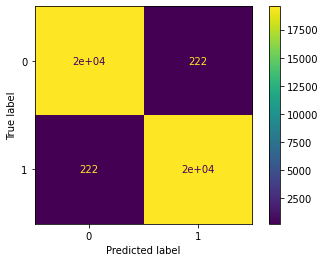

In [ ]:
pred = balanced_log_regs_libl['toxic'].predict(X_train_features['toxic'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['toxic']['toxic'], y_pred=pred)).plot()

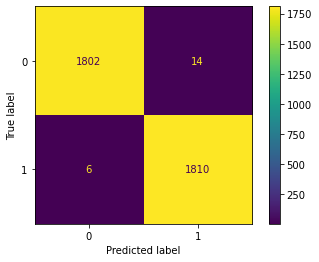

In [ ]:
pred = balanced_log_regs_libl['identity_hate'].predict(X_train_features['identity_hate'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['identity_hate']['identity_hate'], y_pred=pred)).plot()

### Balanced Reduced Iter

In [ ]:
balanced_log_regs_iter = {}

In [ ]:
for clss in classes:
  balanced_log_regs_iter[clss] = LogisticRegression(class_weight='balanced', max_iter = 30)
  balanced_log_regs_iter[clss].fit(X_train_features[clss], balanced_data[clss][clss])

  print("balanced log reg less iterations " + clss)

  print_metrics(X_train_features[clss], balanced_data[clss][clss], balanced_log_regs_iter[clss])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg less iterations toxic
accuracy score: 0.9644841871274124
f1 score: 0.9638876046643037



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg less iterations severe_toxic
accuracy score: 0.9913294797687862
f1 score: 0.9913669064748202



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg less iterations obscene
accuracy score: 0.9857129731716281
f1 score: 0.9856529962633206



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg less iterations threat
accuracy score: 0.9984076433121019
f1 score: 0.9984076433121019



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


balanced log reg less iterations insult
accuracy score: 0.9838136596920647
f1 score: 0.9838471387767161

balanced log reg less iterations identity_hate
accuracy score: 0.9950440528634361
f1 score: 0.995049504950495



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


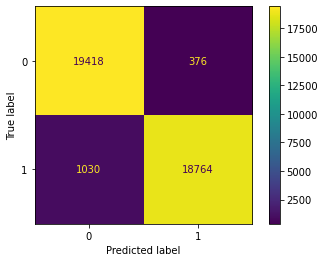

In [ ]:
pred = balanced_log_regs_iter['toxic'].predict(X_train_features['toxic'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['toxic']['toxic'], y_pred=pred)).plot()

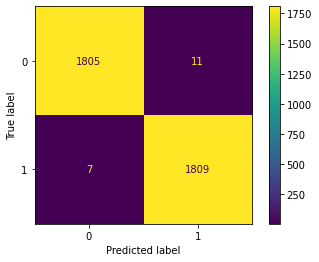

In [ ]:
pred = balanced_log_regs_iter['identity_hate'].predict(X_train_features['identity_hate'])
ConfusionMatrixDisplay(confusion_matrix(y_true=balanced_data['identity_hate']['identity_hate'], y_pred=pred)).plot()

# Validation

In [ ]:
all_models = {"bernoulli NB ":models, 
              "balanced bernoulli NB " : balanced_models, 
              "log regs ": log_regs, 
              "log regs variable iterations ": log_regs_vitr,
              "balanced log regs ": balanced_log_regs,
              "balanced logs regs liblinear ": balanced_log_regs_libl,
              "balanced logs less iterations ": balanced_log_regs_iter
              }

In [ ]:
X_validation_features = count_vect.transform(valid_data['joined'])

In [ ]:
for keyi in all_models.keys():
  f1_scores = []
  for keyj in all_models[keyi].keys():
    print(keyi + keyj + " ")
    f1 = print_metrics(X_validation_features, valid_data[keyj], all_models[keyi][keyj])

    f1_scores.append(f1)

  print("average f1: {}".format(np.mean(np.array(f1_scores))))
  print("")

bernoulli NB toxic 
accuracy score: 0.9180040120361084
f1 score: 0.2984983144345694

bernoulli NB severe_toxic 
accuracy score: 0.9895042269666141
f1 score: 0.0034013605442176874

bernoulli NB obscene 
accuracy score: 0.946446482304055
f1 score: 0.06969508400746732

bernoulli NB threat 
accuracy score: 0.9970447055452071
f1 score: 0.0

bernoulli NB insult 
accuracy score: 0.9492764006304628
f1 score: 0.045178691840863115

bernoulli NB identity_hate 
accuracy score: 0.9903818598653102
f1 score: 0.0

average f1: 0.06946224180451958

balanced bernoulli NB toxic 
accuracy score: 0.5889095859005589
f1 score: 0.2982327401699994

balanced bernoulli NB severe_toxic 
accuracy score: 0.5842348473993408
f1 score: 0.043591116970870585

balanced bernoulli NB obscene 
accuracy score: 0.5843423126522425
f1 score: 0.19114007877034614

balanced bernoulli NB threat 
accuracy score: 0.5473205330276544
f1 score: 0.012271377208066281

balanced bernoulli NB insult 
accuracy score: 0.5849691932941682
f1 scor

The best model seems to be the log reg without resampling (balancing). 

# Testing

In [ ]:
X_testing_features = count_vect.transform(test_data['joined'])

In [ ]:
best_model = 'log regs variable iterations '
for keyj in all_models[best_model].keys():
    print(best_model + keyj + " ")
    f1 = print_metrics(X_testing_features, test_data[keyj], all_models[best_model][keyj])

    print("average f1: {}".format(np.mean(np.array(f1_scores))))

log regs variable iterations toxic 
accuracy score: 0.8898995939693432
f1 score: 0.6039850560398505

average f1: 0.4582891038066255
log regs variable iterations severe_toxic 
accuracy score: 0.9722703094016556
f1 score: 0.2411714039621016

average f1: 0.4582891038066255
log regs variable iterations obscene 
accuracy score: 0.9439111139089107
f1 score: 0.6325773195876289

average f1: 0.4582891038066255
log regs variable iterations threat 
accuracy score: 0.9885744861666299
f1 score: 0.3019230769230769

average f1: 0.4582891038066255
log regs variable iterations insult 
accuracy score: 0.9319662585376601
f1 score: 0.5539160045402951

average f1: 0.4582891038066255
log regs variable iterations identity_hate 
accuracy score: 0.9741902993295772
f1 score: 0.3653250773993808

average f1: 0.4582891038066255


# Interpreting

## Experimentation

### Count vectorizer experimentation

In [ ]:
words = count_vect.get_feature_names_out()

### Log reg experimentation

In [ ]:
all_models['log regs ']['toxic'].get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
toxic_coef = all_models['log regs ']['toxic'].coef_

### Together

In [ ]:
toxic_coef

array([[ 6.30294755e-01, -8.68483094e-05, -1.92215330e-03, ...,
        -1.04327139e-03,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
np.size(toxic_coef)

229519

In [ ]:
np.argmax(toxic_coef)

75551

In [ ]:
x=np.argsort(toxic_coef)[0]
# ascending

In [ ]:
x

array([194949, 148757, 210915, ...,  94036,  75601,  75551])

In [ ]:
x[0:10]

array([194949, 148757, 210915, 113974,  73969,  43581, 179714,  98757,
        59213, 114369])

In [ ]:
x[-10:]

array([ 75565,  13260, 193910, 193061,  13124,  68267, 193879,  94036,
        75601,  75551])

In [ ]:
words[x[0:10]]

array(['supertrll', 'parents', 'unfortunately', 'lawdy', 'fought',
       'court', 'semi', 'interested', 'early', 'learned'], dtype=object)

In [ ]:
words[x[-10:]]

array(['fucked', 'asshole', 'sucks', 'stupid', 'ass', 'faggot', 'suck',
       'idiot', 'fucking', 'fuck'], dtype=object)

### Word cloud

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
word_dict = {A: B for A, B in zip(words, toxic_coef[0])}

In [ ]:
word_dict['fuck']

7.614692369687264

In [ ]:
np.max(toxic_coef)

7.614692369687264

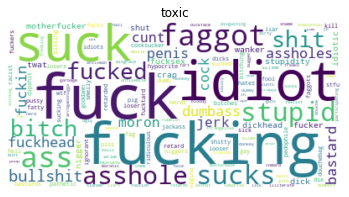

In [ ]:
word_cloud = WordCloud(background_color='white')
word_cloud.fit_words(word_dict)
plt.title('toxic')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Top, Bottom n Words

In [ ]:
coeffs = {}

In [ ]:
n=10

In [ ]:
words = count_vect.get_feature_names_out()

In [ ]:
for clss in classes:
  coeffs[clss] = all_models[best_model][clss].coef_
  x=np.argsort(coeffs[clss])[0]

  print(clss)
  print("top {} words: ".format(n))
  print(np.flip(words[x[-n:]]))

  print("bottom {} words: ".format(n))
  print(words[x[0:n]])

  print("")

toxic
top 10 words: 
['fuck' 'fucking' 'idiot' 'suck' 'faggot' 'sucks' 'stupid' 'ass' 'asshole'
 'bitch']
bottom 10 words: 
['supertrll' 'parents' 'nambla' 'fought' 'physical' 'relation' 'semi'
 'unfortunately' 'range' 'court']

severe_toxic
top 10 words: 
['fucknig' 'dickbreath' 'cocksucker' 'gits' 'motherfucker' 'fcking'
 'niggers' 'suckers' 'douche' 'titty']
bottom 10 words: 
['curps' 'bongwarriorcongratualtions' 'slap' 'sloppy' 'misterwiki'
 'eppstein' 'david' 'idea' 'looks' 'bag']

obscene
top 10 words: 
['fuck' 'fucking' 'bitch' 'asshole' 'cunt' 'fucked' 'ass' 'motherfucker'
 'fuckhead' 'bullshit']
bottom 10 words: 
['bradbury' 'lick' 'bush' 'anthony' 'sexsex' 'alstair' 'laurent' 'eats'
 'asian' 'heil']

threat
top 10 words: 
['kill' 'kick' 'hang' 'cut' 'die' 'destroy' 'attack' 'musulmans' 'burn'
 'behead']
bottom 10 words: 
['fag' 'drink' 'bleachanhero' 'personal' 'someone' 'penis' 'us' 'utc'
 'around' 'many']

insult
top 10 words: 
['idiot' 'asshole' 'bitch' 'assholes' 'faggot'

## Top Words Word Clouds

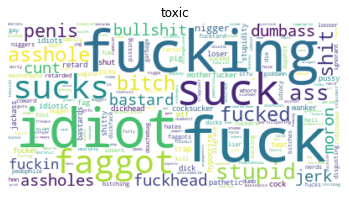

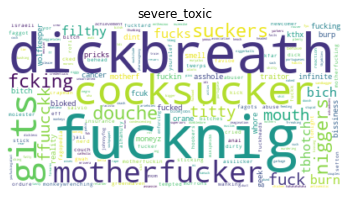

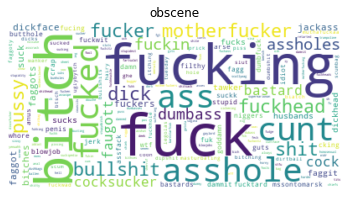

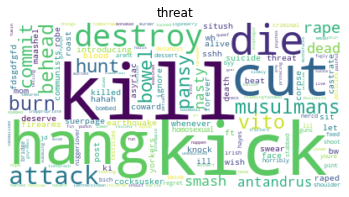

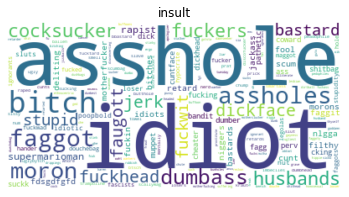

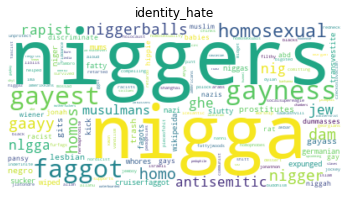

In [ ]:
for clss in classes:
  word_dict = {A: B for A, B in zip(words, coeffs[clss][0])}
  word_cloud = WordCloud(background_color='white')
  word_cloud.fit_words(word_dict)
  plt.title(clss)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
